In [15]:
import pandas as pd 
import numpy as np
import ast
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df_2 = pd.read_csv('NSF3_TD2_Norm_DataFrame.csv')
participant = ['2']*len(df_2)
df_2['participant'] = participant
print("Baby 2 done!")

df_3 = pd.read_csv('NSF3_TD3_Norm_DataFrame.csv')
participant = ['3']*len(df_3)
df_3['participant'] = participant
print("Baby 3 done!")

df_4 = pd.read_csv('NSF3_TD4_Norm_DataFrame.csv')
participant = ['4']*len(df_4)
df_4['participant'] = participant
print("Baby 4 done!")

df_6 = pd.read_csv('NSF3_TD6_Norm_DataFrame.csv')
participant = ['6']*len(df_6)
df_6['participant'] = participant
print("Baby 6 done!")

df_7 = pd.read_csv('NSF3_TD7_Norm_DataFrame.csv')
participant = ['7']*len(df_7)
df_7['participant'] = participant
print("Baby 7 done!")

df_8 = pd.read_csv('NSF3_TD8_Norm_DataFrame.csv')
participant = ['8']*len(df_8)
df_8['participant'] = participant
print("Baby 8 done!")

df_9 = pd.read_csv('NSF3_TD9_Norm_DataFrame.csv')
participant = ['9']*len(df_9)
df_9['participant'] = participant
print("Baby 9 done!")

df_12 = pd.read_csv('NSF3_TD12_Norm_DataFrame.csv')
participant = ['12']*len(df_12)
df_12['participant'] = participant
print("Baby 12 done!")

df_14 = pd.read_csv('NSF3_TD14_Norm_DataFrame.csv')
participant = ['14']*len(df_14)
df_14['participant'] = participant
print("Baby 14 done!")

df = pd.concat([df_2, df_3, df_4, df_6, df_7, df_8, df_9, df_12, df_14], ignore_index=True)

Baby 2 done!
Baby 3 done!
Baby 4 done!
Baby 6 done!
Baby 7 done!
Baby 8 done!
Baby 9 done!
Baby 12 done!
Baby 14 done!


In [5]:
len(df)

47286

In [6]:
df.head()

,timestamp,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature2270.1,feature2271.1,feature2272.1,feature2273.1,feature2274.1,feature2275.1,feature2276.1,feature2277.1,feature2278.1,participant
0,0:0:5:100,0.384544,0.784702,1.182903,1.569405,1.915799,2.246634,2.606555,2.897071,3.168263,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,0:0:5:133,0.394474,0.766415,1.161900,1.540648,1.903676,2.225545,2.558765,2.825347,3.088940,...,-0.072938,-0.051597,0.044338,0.039967,0.075449,0.100666,0.021340,0.036347,0.015735,2
2,0:0:5:166,0.394474,0.780239,1.168709,1.553257,1.915391,2.236068,2.568437,2.846023,3.088940,...,0.000000,0.000000,-0.014155,0.016869,0.018200,0.004300,0.000000,-0.012998,-0.013474,2
3,0:0:5:200,0.410331,0.797711,1.207369,1.598556,1.968671,2.299331,2.640534,2.923247,3.159498,...,0.000478,-0.014711,-0.003346,-0.015302,-0.030464,-0.020010,-0.011766,-0.005951,0.008982,2
4,0:0:5:500,0.407036,0.764978,1.128754,1.483874,1.816720,2.126112,2.432479,2.721737,3.007626,...,0.016738,0.066112,0.077029,0.011908,0.030727,0.056695,0.018953,0.048275,0.027105,2


In [7]:
df.tail()

,timestamp,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature2270.1,feature2271.1,feature2272.1,feature2273.1,feature2274.1,feature2275.1,feature2276.1,feature2277.1,feature2278.1,participant
47281,0:10:50:966,0.357283,0.702042,1.075646,1.432053,1.767305,2.100260,2.440190,2.681465,2.872210,...,0.022563,0.025125,0.011648,0.019480,0.027867,0.019773,0.011545,0.007880,-0.003412,14
47282,0:10:51:0,0.372968,0.747278,1.137351,1.508563,1.838397,2.160951,2.469489,2.710819,2.925326,...,-0.054503,-0.051711,-0.047986,0.009124,0.024216,0.022742,0.008967,0.002990,-0.005975,14
47283,0:10:51:33,0.394922,0.774745,1.172408,1.566053,1.893070,2.225220,2.515366,2.753563,2.967909,...,0.051280,0.048096,0.052044,0.018581,0.018845,0.034482,0.003170,0.021236,0.018080,14
47284,0:10:51:66,0.408669,0.787648,1.199179,1.592652,1.935619,2.265737,2.553662,2.780063,2.990363,...,-0.045629,-0.034074,-0.043097,-0.011845,-0.019400,-0.033485,-0.013483,-0.029622,-0.015257,14
47285,0:10:51:100,0.387958,0.776632,1.182539,1.556552,1.896617,2.210418,2.504110,2.710994,2.912691,...,-0.006153,-0.000790,0.011825,0.006978,0.004346,0.016307,-0.002965,0.008989,0.011980,14


In [2]:
#df.to_csv('9_Baby_Huge_DF.csv', index=None)
df = pd.read_csv('9_Baby_Huge_DF.csv')

In [3]:
features = list(df.columns)[1:-1]
x = df.loc[:, features].values
y = df.loc[:,['participant']].values

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [5]:
principalDf.head()

,principal component 1,principal component 2
0,-11.377293,-5.217473
1,-13.515615,-6.020178
2,-13.391593,-5.530075
3,-13.358231,-5.295263
4,-17.654517,-9.387291


In [6]:
principalDf.tail()

,principal component 1,principal component 2
47281,-19.857743,3.863887
47282,-16.377339,5.458145
47283,-15.348324,5.910620
47284,-15.127004,4.708746
47285,-16.103171,4.014837


In [7]:
finalDf = pd.concat([principalDf, df['participant']], axis = 1)

In [8]:
finalDf.head()

,principal component 1,principal component 2,participant
0,-11.377293,-5.217473,2
1,-13.515615,-6.020178,2
2,-13.391593,-5.530075,2
3,-13.358231,-5.295263,2
4,-17.654517,-9.387291,2


In [9]:
finalDf.tail()

,principal component 1,principal component 2,participant
47281,-19.857743,3.863887,14
47282,-16.377339,5.458145,14
47283,-15.348324,5.910620,14
47284,-15.127004,4.708746,14
47285,-16.103171,4.014837,14


In [10]:
finalDf.to_csv('9_Baby_PC12_DF.csv', index=None)

In [19]:
"""
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['2', '12']
colors = ['b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['participant'] == target
    #sns.kdeplot(finalDf.loc[indicesToKeep, 'principal component 1'], 
               #finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()
"""

"\nfig = plt.figure(figsize = (8,8))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nax.set_title('2 Component PCA', fontsize = 20)\n\n\ntargets = ['2', '12']\ncolors = ['b', 'g']\nfor target, color in zip(targets,colors):\n    indicesToKeep = finalDf['participant'] == target\n    #sns.kdeplot(finalDf.loc[indicesToKeep, 'principal component 1'], \n               #finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)\n    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], \n               finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)\nax.legend(targets)\nax.grid()\n"

In [11]:
pca.explained_variance_ratio_

array([0.65550272, 0.11645158])

In [13]:
analysis_DF = pd.DataFrame(pca.components_, columns=features, index = ['PC1','PC2'])

In [14]:
analysis_DF

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature2269.1,feature2270.1,feature2271.1,feature2272.1,feature2273.1,feature2274.1,feature2275.1,feature2276.1,feature2277.1,feature2278.1
PC1,-0.000480,-0.000126,0.001004,0.00291,0.005386,0.008200,0.010603,0.011455,0.012298,0.014878,...,0.000452,0.000233,0.000217,0.000179,0.000427,0.000498,0.000509,0.000076,0.000098,0.000024
PC2,0.005268,0.010822,0.015701,0.02051,0.025038,0.029979,0.033774,0.034814,0.032209,0.025880,...,0.000089,0.000957,0.001053,0.001082,0.000221,0.000437,0.000636,0.000257,0.000508,0.000260


In [29]:
most_highly_correlated_feature = analysis_DF.idxmax(axis=1)
hc_value = analysis_DF.max(axis=1)
most_negatively_correlated_feature = analysis_DF.idxmin(axis=1)
nc_value = analysis_DF.min(axis=1)

ana_df  = pd.DataFrame(columns = ["Corr", "Feature Name", "Value"])
l = ["High", most_highly_correlated_feature, hc_value]
ana_df.loc[len(ana_df)] = l
m = ["Low", most_negatively_correlated_feature, nc_value]
ana_df.loc[len(ana_df)] = m

In [30]:
ana_df

,Corr,Feature Name,Value
0,High,PC1 feature810 PC2 feature288 dtype: object,PC1 0.053716 PC2 0.052712 dtype: float64
1,Low,PC1 feature29 PC2 feature966 dtype: object,PC1 -0.023444 PC2 -0.048753 dtype: float64


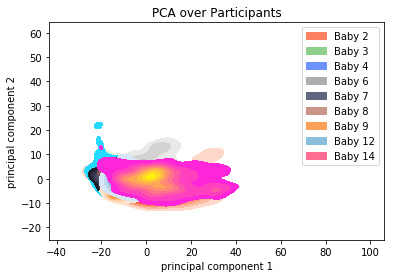

In [39]:
# Setting up the samples 
baby2 = finalDf.query("participant=='2'")
baby3 = finalDf.query("participant=='3'")
baby4 = finalDf.query("participant=='4'")
baby6 = finalDf.query("participant=='6'")
baby7 = finalDf.query("participant=='7'")
baby8 = finalDf.query("participant=='8'")
baby9 = finalDf.query("participant=='9'")
baby12 = finalDf.query("participant=='12'")
baby14 = finalDf.query("participant=='14'")

label_patches = []

# Plotting the KDE Plot 2
sns.kdeplot(baby2['principal component 1'], baby2['principal component 2'], shade=True, cmap="Reds", 
            shade_lowest=False)
label = 'Baby 2'
label_patch = mpatches.Patch(color=sns.color_palette("Reds")[2], label=label)
label_patches.append(label_patch)


# Plotting the KDE Plot 3
sns.kdeplot(baby3['principal component 1'], baby3['principal component 2'], shade=True, cmap="Greens", 
            shade_lowest=False)
label = 'Baby 3'
label_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label=label)
label_patches.append(label_patch)


# Plotting the KDE Plot 4
sns.kdeplot(baby4['principal component 1'], baby4['principal component 2'], shade=True, 
            cmap="cool", shade_lowest=False)
label = 'Baby 4'
label_patch = mpatches.Patch(color=sns.color_palette("cool")[2], label=label)
label_patches.append(label_patch)


# Plotting the KDE Plot 6
sns.kdeplot(baby6['principal component 1'], baby6['principal component 2'], shade=True, cmap="Greys", 
            shade_lowest=False)
label = 'Baby 6'
label_patch = mpatches.Patch(color=sns.color_palette("Greys")[2], label=label)
label_patches.append(label_patch)


# Plotting the KDE Plot 7
sns.kdeplot(baby7['principal component 1'], baby7['principal component 2'], shade=True, cmap='bone', 
            shade_lowest=False)
label = 'Baby 7'
label_patch = mpatches.Patch(color=sns.color_palette("bone")[2], label=label)
label_patches.append(label_patch)


# Plotting the KDE Plot 8
sns.kdeplot(baby8['principal component 1'], baby8['principal component 2'], shade=True, cmap='pink', 
            shade_lowest=False)
label = 'Baby 8'
label_patch = mpatches.Patch(color=sns.color_palette("pink")[2], label=label)
label_patches.append(label_patch)


# Plotting the KDE Plot 9
sns.kdeplot(baby9['principal component 1'], baby9['principal component 2'], shade=True, cmap="Oranges", 
            shade_lowest=False)
label = 'Baby 9'
label_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label=label)
label_patches.append(label_patch)


# Plotting the KDE Plot 12
sns.kdeplot(baby12['principal component 1'], baby12['principal component 2'], shade=True, cmap="Blues", 
            shade_lowest=False)
label = 'Baby 12'
label_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label=label)
label_patches.append(label_patch)


# Plotting the KDE Plot 14
sns.kdeplot(baby14['principal component 1'], baby14['principal component 2'], shade=True, cmap="spring", 
            shade_lowest=False)
label = 'Baby 14'
label_patch = mpatches.Patch(color=sns.color_palette("spring")[2], label=label)
label_patches.append(label_patch)

plt.title('PCA over Participants')
plt.legend(handles=label_patches, loc='upper right')
plt.show()